In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from fancyimpute import IterativeImputer

from sys import path # modificar la lista de rutas de búsqueda que el intérprete de Python utiliza para buscar módulos y paquetes.
import os # interactua con el sistema operativo
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

../resources/dataset_a_2021.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_a_2021v2.xlsx
../resources/dataset_a_2021v3.xlsx
../resources/dataset_a_2021v4.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv


In [2]:
df = pd.read_excel(open('../resources/dataset_a_2021v4.xlsx','rb'))
df.head()

,exitosos,fallidos,envios,e0,e1,e2,e3,e4,e5,e6,...,e44,e45,e46,e47,e48,e49,e50,e51,e52,sol1
0,10,21,31,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,7,9,16,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,6,10,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [26]:
# Dimensión del conjunto de datos
df.shape

(839, 57)

In [25]:
# Imprimir las primeras filas
df.head()

,exitosos,fallidos,envios,e0,e1,e2,e3,e4,e5,e6,...,e44,e45,e46,e47,e48,e49,e50,e51,e52,sol1
0,10,21,31,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,7,9,16,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,6,10,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [27]:
# Estructura de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 57 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   exitosos  839 non-null    int64  
 1   fallidos  839 non-null    int64  
 2   envios    839 non-null    int64  
 3   e0        839 non-null    int64  
 4   e1        839 non-null    int64  
 5   e2        839 non-null    int64  
 6   e3        839 non-null    int64  
 7   e4        839 non-null    int64  
 8   e5        839 non-null    int64  
 9   e6        839 non-null    int64  
 10  e7        839 non-null    int64  
 11  e8        839 non-null    int64  
 12  e9        839 non-null    int64  
 13  e10       839 non-null    int64  
 14  e11       839 non-null    int64  
 15  e12       839 non-null    int64  
 16  e13       839 non-null    int64  
 17  e14       839 non-null    int64  
 18  e15       839 non-null    int64  
 19  e16       839 non-null    int64  
 20  e17       839 non-null    int64 

In [32]:
# Visualización de datos faltantes
# msno.matrix(df, sort='ascending')

In [31]:
# Análisis de variables categóricas o enteras
# df['fallidos'].value_counts()
# df['exitosos'].value_counts()
# df['envios'].value_counts()
# df['sol1'].value_counts()

In [30]:
# Análisis de variables numéricas
# df['exitosos'].describe()
# df['fallidos'].describe()
# df['envios'].describe()
# df['sol1'].describe()

In [6]:
# Coeficiente de asimetría
def c_skew(x):
    m3 = np.mean((x - np.mean(x, axis=0)) ** 3, axis=0)
    skew = m3 / (np.std(x, axis=0) ** 3)
    return skew

c_skew(df['exitosos'])
c_skew(df['fallidos'])
c_skew(df['envios'])
c_skew(df['sol1'])

0.033079652062595215

In [33]:
# Coeficiente de variación
def coef_var(x):
    return np.std(x, axis=0) / np.mean(x, axis=0)

# coef_var(df['exitosos'])
# coef_var(df['fallidos'])
# coef_var(df['envios'])
coef_var(df['sol1'])

0.5027829289053924

In [34]:
# Coeficiente de variación
def coef_var(x):
    return np.std(x, axis=0, ddof=1) / np.mean(x, axis=0)

# coef_var(df['sol1'])
# coef_var(df['exitosos'])
coef_var(df['fallidos'])

0.747107554625991

In [11]:
# Diagnóstico numérico con flextable
# diagnosis_numeric = diagnose_numeric(df)
# diagnosis_numeric_table = pd.DataFrame(diagnosis_numeric)


In [35]:
# Eliminar filas con valores faltantes
data2 = df.dropna()

In [36]:
# Tabla de frecuencias
n = len(data2['sol1'])
amplitud = (np.nanmax(data2['sol1']) - np.nanmin(data2['sol1'])) / (1 + 3.322 * np.log10(n))
data2['sol1.cut'] = pd.cut(data2['sol1'], bins=np.arange(0, 7.56, 0.56))
f_i = data2['sol1.cut'].value_counts().sort_index().values
F_i = f_i.cumsum()
h_i = f_i / len(data2['sol1'])
H_i = F_i / len(data2['sol1'])

table = pd.DataFrame({'f_i': f_i, 'F_i': F_i, 'h_i': h_i, 'H_i': H_i}, index=data2['sol1.cut'].value_counts().sort_index().index)
print(table)


              f_i  F_i       h_i       H_i
sol1.cut                                  
(0.0, 0.56]     0    0  0.000000  0.000000
(0.56, 1.12]  152  152  0.181168  0.181168
(1.12, 1.68]   21  173  0.025030  0.206198
(1.68, 2.24]   66  239  0.078665  0.284863
(2.24, 2.8]    79  318  0.094160  0.379023
(2.8, 3.36]    34  352  0.040524  0.419547
(3.36, 3.92]  103  455  0.122765  0.542312
(3.92, 4.48]   76  531  0.090584  0.632896
(4.48, 5.04]   87  618  0.103695  0.736591
(5.04, 5.6]    81  699  0.096544  0.833135
(5.6, 6.16]    53  752  0.063170  0.896305
(6.16, 6.72]   57  809  0.067938  0.964243
(6.72, 7.28]   30  839  0.035757  1.000000


In [ ]:
# Diagnóstico de categorías con flextable
# table = FlexTable()
# table.add_df(diagnose_category(data2, 'sol1.cut'))
# table

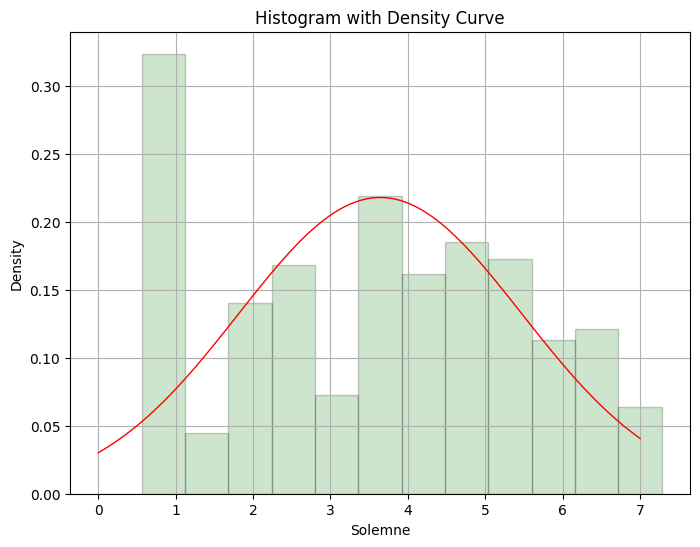

In [37]:
# Histograma con curva de densidad
plt.figure(figsize=(8, 6))
plt.hist(data2['sol1'], bins=np.arange(0, 7.56, 0.56), density=True, color='green', alpha=0.2, edgecolor='black')
mu = np.mean(data2['sol1'])
sigma = np.std(data2['sol1'])
x = np.linspace(0, 7, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', linewidth=1)
plt.xlabel('Solemne')
plt.ylabel('Density')
plt.title('Histogram with Density Curve')
plt.grid(True)
plt.show()

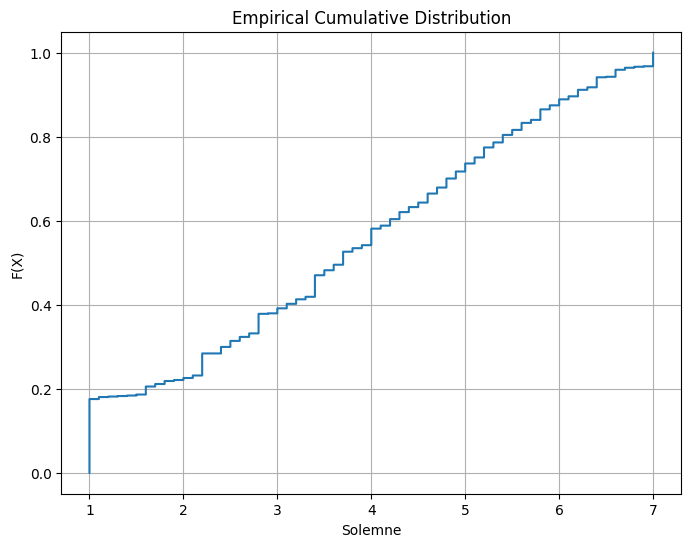

In [38]:
# Distribución empírica acumulada
plt.figure(figsize=(8, 6))
plt.step(np.sort(data2['sol1']), np.arange(1, len(data2['sol1']) + 1) / len(data2['sol1']), where='post')
plt.xlabel('Solemne')
plt.ylabel('F(X)')
plt.title('Empirical Cumulative Distribution')
plt.grid(True)
plt.show()

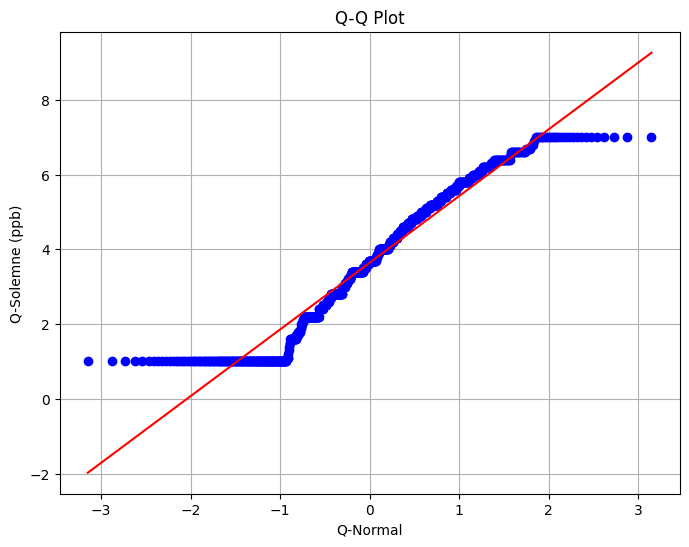

In [39]:
# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data2['sol1'], dist="norm", plot=plt)
plt.xlabel('Q-Normal')
plt.ylabel('Q-Solemne (ppb)')
plt.title('Q-Q Plot')
plt.grid(True)
plt.show()

In [40]:
# Prueba de normalidad
kstest_result = stats.kstest(data2['sol1'], 'norm', args=(np.mean(data2['sol1']), np.std(data2['sol1'])))
shapiro_result = stats.shapiro(data2['sol1'])
print('KS test p-value:', kstest_result.pvalue)
print('Shapiro-Wilk test p-value:', shapiro_result.pvalue)

KS test p-value: 4.916091422695989e-08
Shapiro-Wilk test p-value: 1.9628936378879243e-17


In [ ]:
# Diagnóstico de normalidad con flextable
# table = FlexTable()
# table.add_df(normality(data2))
# table

In [ ]:
# Detección de valores atípicos
# outlier_table = FlexTable()
# outlier_table.add_df(diagnose_outlier(data2))
# outlier_table

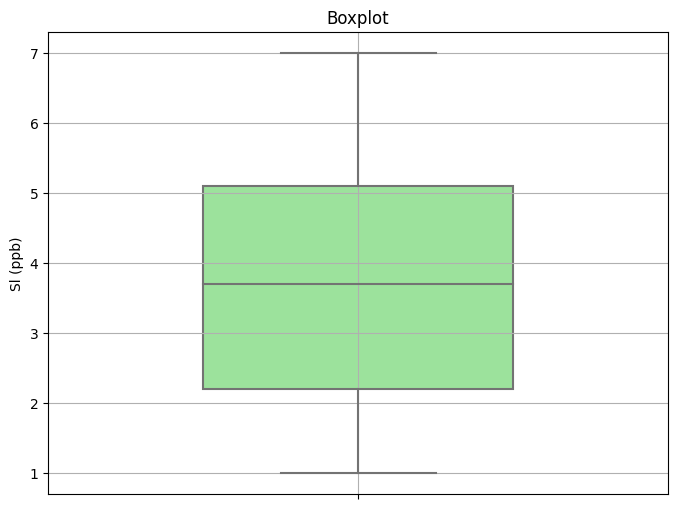

In [41]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data2, y='sol1', color='lightgreen', width=0.5)
plt.xlabel('')
plt.ylabel('Sl (ppb)')
plt.title('Boxplot')
plt.grid(True)
plt.show()

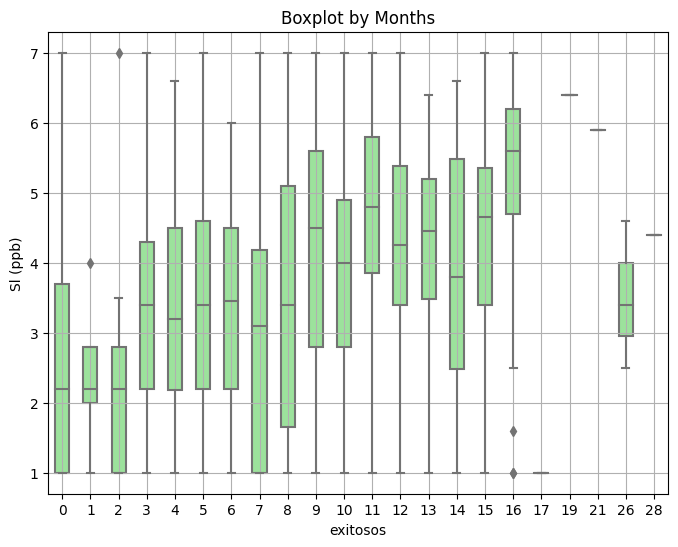

In [42]:
# Boxplot por meses
plt.figure(figsize=(8, 6))
sns.boxplot(data=data2, x='exitosos', y='sol1', color='lightgreen', width=0.5)
plt.xlabel('exitosos')
plt.ylabel('Sl (ppb)')
plt.title('Boxplot by Months')
plt.grid(True)
plt.show()

In [45]:
# Análisis e imputación de datos faltantes
missing_data = data2.isnull().sum()
missing_data_table = pd.DataFrame({'Variable': missing_data.index, 'Missing Count': missing_data.values})
print(missing_data_table)

    Variable  Missing Count
0   exitosos              0
1   fallidos              0
2     envios              0
3         e0              0
4         e1              0
5         e2              0
6         e3              0
7         e4              0
8         e5              0
9         e6              0
10        e7              0
11        e8              0
12        e9              0
13       e10              0
14       e11              0
15       e12              0
16       e13              0
17       e14              0
18       e15              0
19       e16              0
20       e17              0
21       e18              0
22       e19              0
23       e20              0
24       e21              0
25       e22              0
26       e23              0
27       e24              0
28       e25              0
29       e26              0
30       e27              0
31       e28              0
32       e29              0
33       e30              0
34       e31        

In [48]:
# Imputación de valores perdidos
# imputer = IterativeImputer(random_state=46)
# imputed_data = imputer.fit_transform(data2.iloc[:, :6])
# imputed_data = pd.DataFrame(imputed_data, columns=data2.columns[:6])
# imputed_data['sol1']
# completed_data = imputed_data
# diagnose(completed_data)